# Monte Carlo algos and tests, from TD2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:

def equilibration(x_0, M_eq, proba, delta=0.1):
    """apply M_eq steps to get to stationnary state

    Args:
        x_0 (float): initial point
        M_eq (int): number of steps
        proba (func): proba density function
        delta (float): steps size

    Returns:
        float: point after M_eq iterations
    """
    x = x_0
    for i in range(0, M_eq -1):
        x_new = x + delta * (2*np.random.rand() -1) 

        A = min(1, proba(x_new)/proba(x))
        if np.random.rand() < A:
            x = x_new
        else:
            x = x
            
    return x


def measurement(x_eq, M, proba, delta=0.1):
    """Monte carlo sample of M points

    Args:
        x_eq (float): initial point
        M (int): number of steps
        proba (func): proba density function
        delta (float): steps size

    Returns:
        ndarray: sampled points
    """
    X = np.empty((M))
    X[0] = x_eq

    for i in range(0, M-1):
        x = X[i]
        x_new = x + delta * (2*np.random.rand() -1) 

        A = min(1, proba(x_new)/proba(x))
        if np.random.rand() < A:
            X[i+1] = x_new
        else:
            X[i+1] = x
    
    return X



def MonteCarlo(proba, M, x_0, M_eq, delta):
    """Monte Carlo sample of M points after Meq equilibration steps

    Args:
        proba (func): proba density function 
        Meq (int): number of equilibration steps
        M (int): number of sampled points 
        x_0 (float): initial point
        delta (float): steps size

    Returns:
        ndarray: sampled points
    """
    x_eq = equilibration(x_0, M_eq, proba, delta)
    return measurement(x_eq, M, proba, delta)

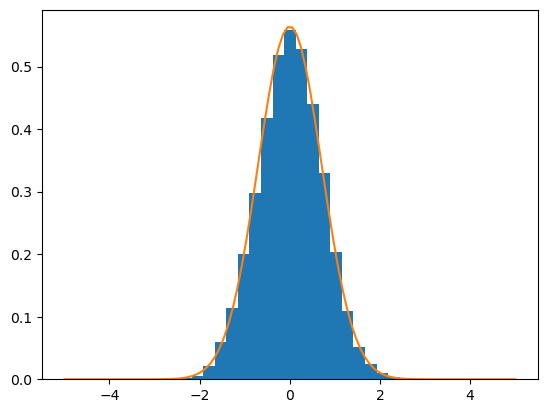

In [79]:
def p(x):
    return np.exp(-x**2)/np.sqrt(np.pi)

X = MonteCarlo(proba=p, M=int(1e6), x_0=0, M_eq=int(1e4), delta=0.1)
X.shape, X


plt.hist(X, density=True, bins=np.linspace(-5, 5, 40))

x_axis = np.linspace(-5, 5, 100)
plt.plot(x_axis, p(x_axis))